# Homework 4 - Aprendizagem

>Teresa Matos- ist1106009   
>Francisco Morão - ist1106067   
>Grupo 46   

## II. Programming

In the next exercise you will use the accounts.csv dataset. This dataset contains account details 
of bank clients, and the target variable y is binary (‘has the client subscribed a term deposit?’).
<br> Select the first 8 features and remove duplicates and null values


1. Normalize the data using MinMaxScaler: <br>
&nbsp;
a. [4v] Using sklearn, apply k-means clustering (without targets) on the normalized data with k={2,3,4,5,6,7,8}, max_iter=500 and random_state=42. Plot the different sum of squared errors (SSE) using the _inertia attribute of k-means according to the number of clusters.

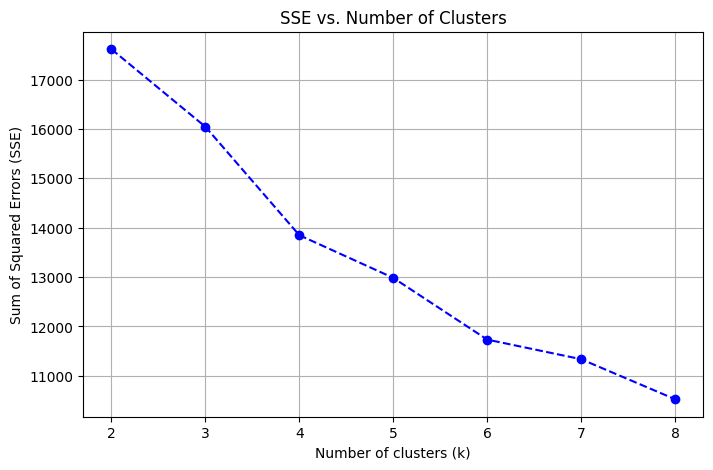

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = pd.read_csv('accounts.csv')

selected_features = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']
data_selected = data[selected_features]

data_encoded = pd.get_dummies(data_selected, drop_first=True)

data_cleaned = data_encoded.drop_duplicates().dropna()

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data_cleaned)

SSE = []
k_values = range(2, 9)
for k in k_values:
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    kmeans.fit(data_normalized)
    SSE.append(kmeans.inertia_)  # inertia is the SSE for K-Means

plt.figure(figsize=(8,5))
plt.plot(k_values, SSE, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('SSE vs. Number of Clusters')
plt.grid(True)
plt.show()


2) [1.5v] According to the previous plot, how many underlying customer segments (clusters) 
should there be ? Explain based on the trade off between the clusters and inertia

Para percebermos quandos clusters devem existir devemos procurar o k (Number of clusters) onde a diminuição da inertia começa a ser menos acentuada. Observando do gráfico, detetamos que de k=2 até k=4 existe uma diminuição acentuada, mas a partir do k=4 esta diminuição já é mais reduzida, indicado que a partir deste k=4 já não ganhamos muito em troca de aumentar o k pois a inertia não diminui muito. <br>
Concluimos, assim que o números de clusters deve ser 4.

3) [1.5v] Would k-modes be a better clustering approach ? Explain why based on the dataset 
features.

Sim, seria melhor utilizar K-modes. Isto deve-se ao facto de os dados do problema serem categorias, o que significa que tomam valores discretos. K-modes é perfeito para lidar com este tipo de dados, uma vez que utiliza o "mode" em vez da média para calcular os clusters e procura diferenças entre categorias ao contrario do K-mean que utliza a distancia Euclidiana. Tudo isto permite que K-mode capture melhor padrões e semelhanças em categorias.<br>
K-mode teria uma melhor eficiencia que K-mean

4) [2v] Apply PCA to the data : <br>
&nbsp; a. [1v] Apply PCA to the data. How much variability is explained by the top 2
components?

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('accounts.csv')
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan']]

df = df.drop_duplicates().dropna()

df_encoded = pd.get_dummies(df, drop_first=True)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance = explained_variance_ratio.sum()

print(f"Explained variance by the top 2 components: {total_explained_variance:.2%}")


Explained variance by the top 2 components: 22.76%


&nbsp; b. [1v] Apply k-means clustering with k=3 and random_state=42 (all other
arguments as default) and use the original 8 features. Next, provide a scatterplot
according to the first 2 principal components. Can we clearly separate the clusters?
Justify.


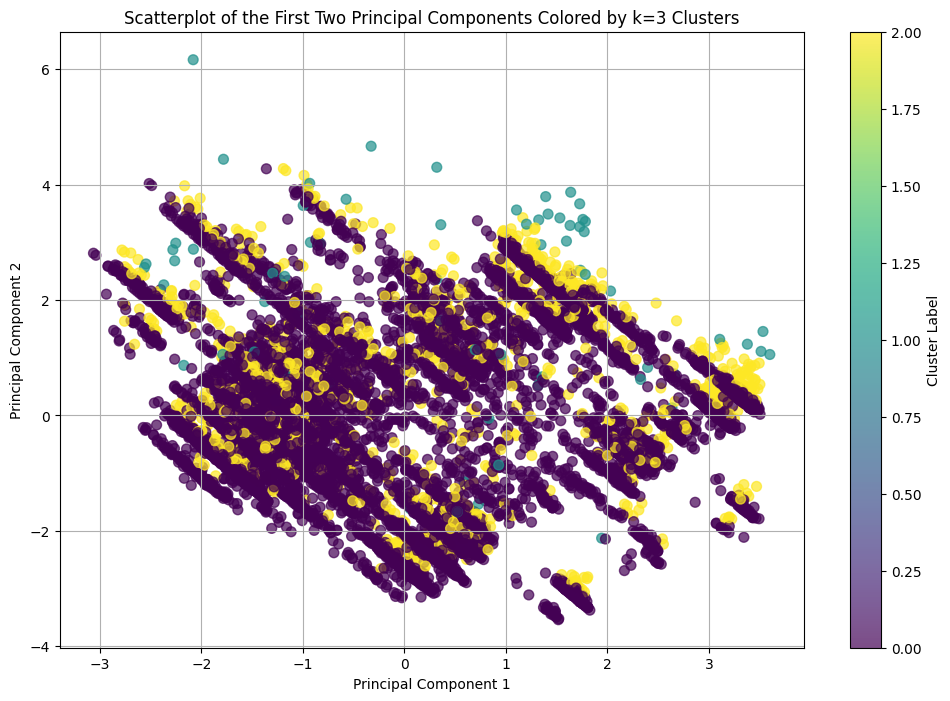

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_encoded)

plt.figure(figsize=(12, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of the First Two Principal Components Colored by k=3 Clusters')
plt.grid()

plt.show()


#### Explicação

Pela observação do gráfico conseguimos perceber que a subreposição de clusters é muito significativa, o que sugere que as duas componentes principais não conseguem captar bem a variação para separar os clusters, levando-nos a acreditar que as componentes não podem ser separadas.

c. [2v] Plot the cluster conditional features of the frequencies of “job” and ”education”
according to the clusters obtained in the previous question (2b.). Use sns.distplot
(see Data Exploration notebook), with multiple="dodge", stat='density',
shrink=0.8 and common_norm=False. Describe the main differences between the
clusters in no more than half a page.


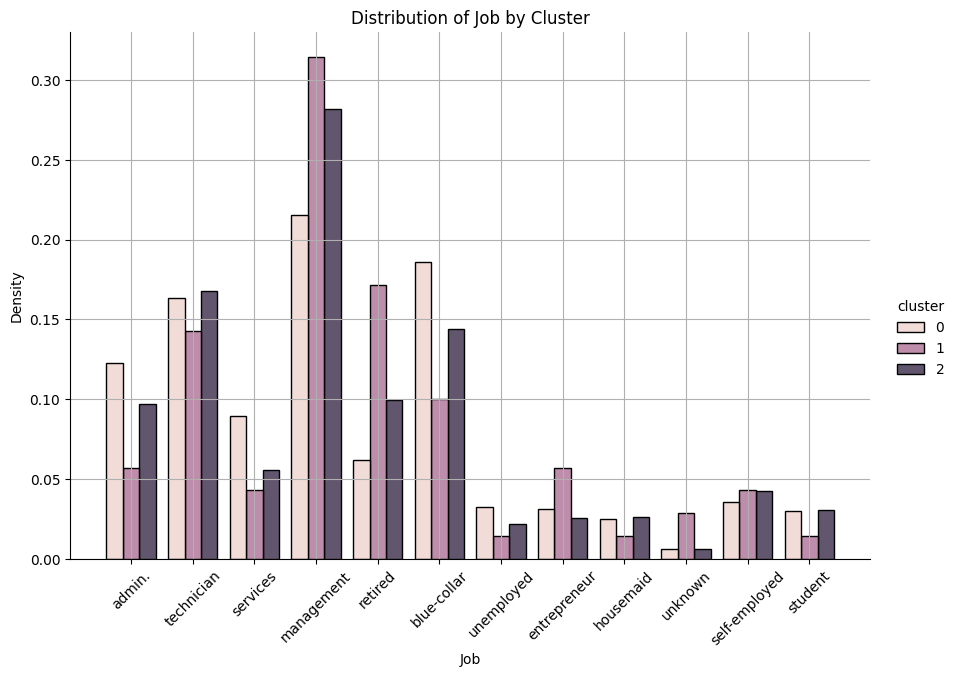

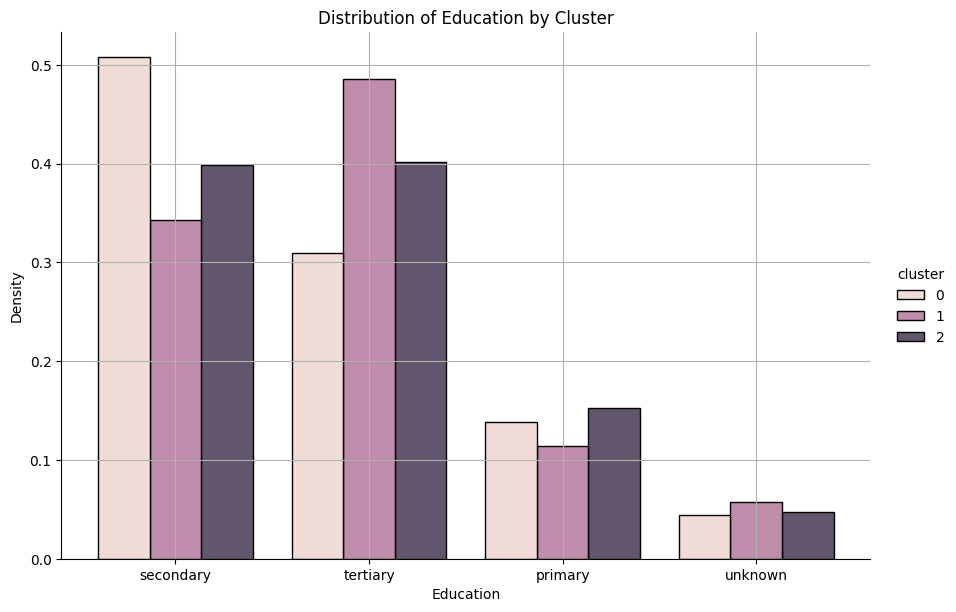

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add the cluster labels to the original DataFrame
df['cluster'] = clusters

# Step 2: Plot the distribution of 'job' using sns.displot and adjust the x-ticks
sns.displot(
    data=df,
    x='job',
    hue='cluster',
    multiple='dodge',
    stat='density',
    shrink=0.8,
    common_norm=False,
    height=6,
    aspect=1.5
)
plt.title('Distribution of Job by Cluster')
plt.xlabel('Job')
plt.ylabel('Density')
plt.xticks(rotation=45)  # Rotate the x-ticks for better spacing
plt.grid()

# Step 3: Plot the distribution of 'education' using sns.displot and adjust the x-ticks
sns.displot(
    data=df,
    x='education',
    hue='cluster',
    multiple='dodge',
    stat='density',
    shrink=0.8,
    common_norm=False,
    height=6,
    aspect=1.5
)
plt.title('Distribution of Education by Cluster')
plt.xlabel('Education')
plt.ylabel('Density')
plt.grid()

plt.show()



No "Job Distribution", no cluster-0 conseguimos perceber que existe uma grande densidade de indivíduos em "management", "admin.", (etc), o que sugere estes indivíduos mais profissionais terem um maior rendimento. No cluster-0 da "Education Distribution" existir uma grande porção de pessoas com educação secondária e terciária. O que nos leva a concluir que o cluster-0 representa trabalhos com altos rendimentos que precisam de altos niveis de educação. <br>

O cluster-1 já reve-la um melhor equilibrio entre os "jobs", incluindo tanto as classes médias como a classe trabalhadora, também existe um equilibrio na educação (secondaria e primaria) indicando que este grupo tem uma diversidade em termos educacionais. <br>

Por ultimo, o cluster-2 tem uma grande densidade em trabalhos manuais e serviços industriais, como "blue-coller" e "services". Existe também, uma maior quantidade de estudantes e desempregados, remetendo por isso, para uma população mais jovem, com menos rendimentos. Por outro lado, este cluster é o que tem a maior densidade de individuos na educação primaria, o que nos leva a concluir que realmente este grupo consiste em pessoas com potencialmente menos rendimentos e ocupações que com mais trabalhos manuais.